In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, SequentialSampler, RandomSampler, BatchSampler
import numpy as np

In [2]:
train_data = pd.read_csv("./train.csv").dropna()
test_data = pd.read_csv("./test.csv").dropna()

In [3]:
type(train_data)

pandas.core.frame.DataFrame

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [6]:
type(train_data['Age'])

pandas.core.series.Series

In [7]:
torch.tensor(train_data['Age'].values)

tensor([38.0000, 35.0000, 54.0000,  4.0000, 58.0000, 34.0000, 28.0000, 19.0000,
        49.0000, 65.0000, 45.0000, 29.0000, 25.0000, 23.0000, 46.0000, 71.0000,
        23.0000, 21.0000, 47.0000, 24.0000, 32.5000, 54.0000, 19.0000, 37.0000,
        24.0000, 36.5000, 22.0000, 61.0000, 56.0000, 50.0000,  1.0000,  3.0000,
        44.0000, 58.0000,  2.0000, 40.0000, 31.0000, 32.0000, 38.0000, 35.0000,
        44.0000, 37.0000, 29.0000, 62.0000, 30.0000, 52.0000, 40.0000, 58.0000,
        35.0000, 37.0000, 63.0000, 19.0000, 36.0000,  2.0000, 50.0000,  0.9200,
        17.0000, 30.0000, 24.0000, 18.0000, 31.0000, 40.0000, 36.0000, 36.0000,
        16.0000, 45.5000, 38.0000, 29.0000, 41.0000, 45.0000,  2.0000, 24.0000,
        24.0000, 22.0000, 60.0000, 24.0000, 25.0000, 27.0000, 36.0000, 23.0000,
        24.0000, 33.0000, 32.0000, 28.0000, 50.0000, 14.0000, 64.0000,  4.0000,
        52.0000, 30.0000, 49.0000, 65.0000, 48.0000, 47.0000, 23.0000, 25.0000,
        35.0000, 58.0000, 55.0000, 54.00

In [8]:
len(torch.tensor(train_data['Age'].values))

183

In [9]:
print(train_data.shape)
print(test_data.shape)

(183, 12)
(87, 11)


In [10]:
print(train_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [11]:
print(f"Total rows = {train_data.shape[0]}")
print("No of unique:")
print()
for column in train_data.columns:
	print(f"{column} = {train_data[column].unique().shape}")

Total rows = 183
No of unique:

PassengerId = (183,)
Survived = (2,)
Pclass = (3,)
Name = (183,)
Sex = (2,)
Age = (63,)
SibSp = (4,)
Parch = (4,)
Ticket = (127,)
Fare = (93,)
Cabin = (133,)
Embarked = (3,)


In [12]:
sexdict = {}
ticketdict = {}
cabindict = {}
embarkeddict = {}

for i,item in enumerate(train_data['Sex'].unique()):
    sexdict[item] = i
for i,item in enumerate(train_data['Ticket'].unique()):
    ticketdict[item] = i
for i,item in enumerate(train_data['Cabin'].unique()):
    cabindict[item] = i
for i,item in enumerate(train_data['Embarked'].unique()):
    embarkeddict[item] = i
train_data['Sex'] = train_data['Sex'].replace(sexdict)
train_data['Ticket'] = train_data['Ticket'].replace(ticketdict)
train_data['Cabin'] = train_data['Cabin'].replace(cabindict)
train_data['Embarked'] = train_data['Embarked'].replace(embarkeddict)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,0,71.2833,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,1,53.1000,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,2,51.8625,2,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,3,16.7000,3,1
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,4,26.5500,4,1


In [13]:
embarkeddict

{'C': 0, 'S': 1, 'Q': 2}

In [14]:
torch.tensor(train_data[['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']].values)

tensor([[  1.0000,   0.0000,  38.0000,  ...,  71.2833,   0.0000,   0.0000],
        [  1.0000,   0.0000,  35.0000,  ...,  53.1000,   1.0000,   1.0000],
        [  1.0000,   1.0000,  54.0000,  ...,  51.8625,   2.0000,   1.0000],
        ...,
        [  1.0000,   0.0000,  56.0000,  ...,  83.1583, 130.0000,   0.0000],
        [  1.0000,   0.0000,  19.0000,  ...,  30.0000, 131.0000,   1.0000],
        [  1.0000,   1.0000,  26.0000,  ...,  30.0000, 132.0000,   0.0000]],
       dtype=torch.float64)

In [15]:
# Train Val Split
# mask = np.random.choice([0,1],size=len(train_data),p=[0.3,0.7])
# print(mask.sum()/len(train_data))
# train_df = train_data[mask]
# val_df = train_data[~mask]
# print(len(train_df))
# print(len(val_df))

In [16]:
train_df = train_data.sample(frac=0.7)
val_df = train_data.drop(train_df.index)
print(len(train_df))
print(len(val_df))
print(len(train_data))
train_df

128
55
183


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
737,738,1,1,"Lesurer, Mr. Gustave J",1,35.0,0,0,100,512.3292,114,0
110,111,0,1,"Porter, Mr. Walter Chamberlain",1,47.0,0,0,17,52.0000,17,1
195,196,1,1,"Lurette, Miss. Elise",0,58.0,0,0,29,146.5208,29,0
438,439,0,1,"Fortune, Mr. Mark",1,64.0,1,4,7,263.0000,7,1
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",0,49.0,1,0,8,76.7292,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
645,646,1,1,"Harper, Mr. Henry Sleeper",1,48.0,1,0,8,76.7292,8,0
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",0,36.0,1,2,64,120.0000,64,1
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",0,29.0,1,1,30,10.4625,3,1
621,622,1,1,"Kimball, Mr. Edwin Nelson Jr",1,42.0,1,0,93,52.5542,94,1


In [42]:
class Dataset():
    def __init__(self, df):
        self.x = torch.tensor(df[['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']].values,dtype=float)
        self.y = torch.tensor(df['Survived'].values,dtype=int)
    def __len__(self): return len(self.y)
    def __getitem__(self, i): return self.x[i],self.y[i]

In [43]:
train_ds,val_ds = Dataset(train_df),Dataset(val_df)
assert len(train_ds)==len(train_df)
assert len(val_ds)==len(val_df)

In [44]:
xb,yb = train_ds[0:5]
print(xb.shape)
print(yb.shape)
xb,yb

torch.Size([5, 9])
torch.Size([5])


(tensor([[  1.0000,   1.0000,  35.0000,   0.0000,   0.0000, 100.0000, 512.3292,
          114.0000,   0.0000],
         [  1.0000,   1.0000,  47.0000,   0.0000,   0.0000,  17.0000,  52.0000,
           17.0000,   1.0000],
         [  1.0000,   0.0000,  58.0000,   0.0000,   0.0000,  29.0000, 146.5208,
           29.0000,   0.0000],
         [  1.0000,   1.0000,  64.0000,   1.0000,   4.0000,   7.0000, 263.0000,
            7.0000,   1.0000],
         [  1.0000,   0.0000,  49.0000,   1.0000,   0.0000,   8.0000,  76.7292,
            8.0000,   0.0000]], dtype=torch.float64),
 tensor([1, 0, 1, 0, 1]))

In [204]:
class Linear(nn.Module):
    def __init__(self, n_in, n_out, p, q):
        super().__init__()
        self.w1 = torch.randn(n_in,n_out,dtype=float).requires_grad_()
        self.w2 = torch.randn(p,q,dtype=float).requires_grad_()
        self.b = torch.zeros(n_out,dtype=float).requires_grad_()
    def forward(self, inp):
        # import pdb
        # pdb.set_trace()
        return torch.einsum('ab,bc,pq->acpq', (inp, self.w1, self.w2)) + self.b[None,:,None,None]
    def parameters(self):
        return (self.w1,self.w2)

In [174]:
fwd = Linear(9,5,2,3)
op = fwd(xb)
print(op.shape)
print(op)

torch.Size([50, 5, 2, 3])
tensor([[[[ -807.3372, -1557.0498,  -560.8619],
          [ 2460.8797,  1617.9540,  1459.7673]],

         [[ -354.8595,  -684.3905,  -246.5230],
          [ 1081.6628,   711.1606,   641.6307]],

         [[ -317.8087,  -612.9335,  -220.7836],
          [  968.7267,   636.9085,   574.6382]],

         [[  -72.2177,  -139.2808,   -50.1701],
          [  220.1299,   144.7288,   130.5787]],

         [[  186.1845,   359.0800,   129.3435],
          [ -567.5172,  -373.1254,  -336.6451]]],


        [[[ -116.1953,  -224.0969,   -80.7215],
          [  354.1798,   232.8625,   210.0956]],

         [[  -69.6199,  -134.2707,   -48.3654],
          [  212.2116,   139.5227,   125.8816]],

         [[   24.2524,    46.7738,    16.8483],
          [  -73.9249,   -48.6034,   -43.8515]],

         [[  -14.0317,   -27.0618,    -9.7479],
          [   42.7705,    28.1203,    25.3710]],

         [[   49.3798,    95.2351,    34.3045],
          [ -150.5168,   -98.9603,   -89.2

In [175]:
fwd.b

tensor([0., 0., 0., 0., 0.], dtype=torch.float64, requires_grad=True)

In [176]:
temp = torch.einsum('abcd->ab',op)
temp

tensor([[ 2.6134e+03,  1.1487e+03,  1.0287e+03,  2.3377e+02, -6.0268e+02],
        [ 3.7612e+02,  2.2536e+02, -7.8505e+01,  4.5420e+01, -1.5984e+02],
        [ 8.3731e+02,  4.5469e+02,  1.1710e+02,  1.0643e+02, -3.1463e+02],
        [ 1.2879e+03,  7.5300e+02,  5.2141e+02,  2.0688e+02, -5.7310e+02],
        [ 4.5709e+02,  2.9337e+02,  1.4318e+01,  6.7287e+01, -2.3128e+02],
        [ 4.5938e+02,  1.0060e+02, -3.7026e+02, -1.0657e+01,  4.1076e+01],
        [ 1.2078e+03,  6.4029e+02,  6.7454e+02,  1.7795e+02, -4.5777e+02],
        [ 1.2219e+03,  6.7028e+02,  4.8550e+02,  1.7836e+02, -4.8082e+02],
        [ 3.9497e+02,  7.6673e+01, -2.7265e+02, -1.3427e+01,  4.9813e+01],
        [ 4.7666e+02,  1.4999e+02, -3.9051e+02,  1.3096e+00, -1.6934e+01],
        [ 8.2346e+02,  2.9046e+02, -1.6655e+02,  3.8170e+01, -8.9236e+01],
        [ 9.0198e+02,  4.5796e+02,  1.0358e+02,  1.1090e+02, -3.0240e+02],
        [ 4.2385e+02, -1.9710e+01, -5.0061e+02,  1.6675e+01,  1.4618e+02],
        [ 3.8699e+02,  2.

In [177]:
class ReLU_Sum(nn.Module):
    def __init__(self,clamp=1):
        super().__init__()
        self.clamp = clamp
    def forward(self,inp):
        if self.clamp:
            # return torch.einsum('abcd->ab',inp).clamp(min=0)/(inp.shape[2]*inp.shape[3])
            # return torch.einsum('abcd->ab',inp).clamp(min=0)
            return torch.mean(inp,dim=[2,3]).clamp(min=0)
        else:
            # return torch.einsum('abcd->ab',inp)/(inp.shape[2]*inp.shape[3])
            # return torch.einsum('abcd->ab',inp)
            return torch.mean(inp,dim=[2,3])

In [178]:
actfn = ReLU_Sum()
temp = actfn(op)
temp,temp.shape

(tensor([[4.3556e+02, 1.9145e+02, 1.7146e+02, 3.8961e+01, 0.0000e+00],
         [6.2687e+01, 3.7560e+01, 0.0000e+00, 7.5701e+00, 0.0000e+00],
         [1.3955e+02, 7.5782e+01, 1.9516e+01, 1.7739e+01, 0.0000e+00],
         [2.1465e+02, 1.2550e+02, 8.6902e+01, 3.4480e+01, 0.0000e+00],
         [7.6182e+01, 4.8895e+01, 2.3863e+00, 1.1214e+01, 0.0000e+00],
         [7.6563e+01, 1.6766e+01, 0.0000e+00, 0.0000e+00, 6.8460e+00],
         [2.0131e+02, 1.0672e+02, 1.1242e+02, 2.9658e+01, 0.0000e+00],
         [2.0365e+02, 1.1171e+02, 8.0917e+01, 2.9727e+01, 0.0000e+00],
         [6.5828e+01, 1.2779e+01, 0.0000e+00, 0.0000e+00, 8.3021e+00],
         [7.9444e+01, 2.4999e+01, 0.0000e+00, 2.1827e-01, 0.0000e+00],
         [1.3724e+02, 4.8409e+01, 0.0000e+00, 6.3617e+00, 0.0000e+00],
         [1.5033e+02, 7.6327e+01, 1.7264e+01, 1.8483e+01, 0.0000e+00],
         [7.0642e+01, 0.0000e+00, 0.0000e+00, 2.7791e+00, 2.4363e+01],
         [6.4498e+01, 4.3230e+01, 1.1080e+01, 1.0584e+01, 0.0000e+00],
      

In [179]:
n_in = 9
nh = 15
n_out = 1
p = 5
q = 5
xb1 = xb
layers = [Linear(n_in,nh,p,q),ReLU_Sum(),Linear(nh,n_out,p,q),ReLU_Sum(0)]
for l in layers: xb1 = l(xb1)
print(xb.shape)
print(yb[:,None].shape)
F.mse_loss(xb,yb[:,None])

torch.Size([50, 9])
torch.Size([50, 1])


/var/folders/c1/p9_k34rn3ts62n7p14f6tdvw0000gn/T/ipykernel_29745/520802797.py:11: UserWarning: Using a target size (torch.Size([50, 1])) that is different to the input size (torch.Size([50, 9])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  F.mse_loss(xb,yb[:,None])


tensor(3106.3630, dtype=torch.float64)

In [270]:
class Model(nn.Module):
    def __init__(self, n_in, nh, n_out, p, q):
        super().__init__()
        # self._modules = {}
        self.layers = nn.ModuleList([Linear(n_in,nh,p,q),ReLU_Sum(),Linear(nh,n_out,p,q),ReLU_Sum(0)])
        # self.l1 = Linear(n_in,nh,p,q)
        # self.r1 = ReLU_Sum()
        # self.l2 = Linear(nh,n_out,p,q)
        # self.r2 = ReLU_Sum(0)

    # def __setattr__(self,k,v):
    #     if not k.startswith("_"): self._modules[k] = v
    #     super().__setattr__(k,v)

    # def __repr__(self): return f'{self._modules}'

    def parameters(self):
        for l in self.layers: yield from l.parameters()
        # for l in self._modules.values(): yield from l.parameters()
        
    # def __call__(self, x, targ):
    def __call__(self, x):
        for l in self.layers: x = l(x)
        # for l in self._modules.values(): x = l(x)
        # return F.mse_loss(x,targ[:,None])
        return x

In [251]:
def collate(b):
    xs,ys = zip(*b)
    return torch.stack(xs),torch.stack(ys)

In [252]:
train_samp = BatchSampler(RandomSampler(train_ds),     50, drop_last=False)
val_samp = BatchSampler(SequentialSampler(val_ds), 50, drop_last=False)

In [253]:
train_dl = DataLoader(train_ds, batch_sampler=train_samp, collate_fn=collate)
val_dl = DataLoader(val_ds, batch_sampler=val_samp, collate_fn=collate)

In [254]:
xb,yb = next(iter(val_dl))
xb.shape,yb.shape

(torch.Size([50, 9]), torch.Size([50]))

In [255]:
# model = Model(9,15,1,5,5)
# loss = model(xb,yb)
# print(loss)
# loss.backward()

In [256]:
# l0 = model.layers[0]
# print(l0.b.grad)

In [257]:
loss_func = F.cross_entropy
bs = 50

In [271]:
model = Model(9,15,2,5,5)
# pred = model(train_ds.x)
# pred.shape

In [259]:
pred

tensor([[ 2.2957e+00, -5.3373e-01],
        [ 5.3893e-01,  1.0078e-03],
        [ 9.1839e-01, -7.0683e-02],
        [ 1.1566e+00, -2.1618e-02],
        [ 5.5305e-01,  3.0777e-02],
        [ 1.1522e+00, -1.7642e-01],
        [ 9.5733e-01, -6.0113e-02],
        [ 1.0804e+00, -8.2242e-02],
        [ 9.3186e-01, -1.7399e-01],
        [ 1.1490e+00, -1.3467e-01],
        [ 1.1693e+00, -2.9553e-01],
        [ 1.0193e+00, -1.2275e-01],
        [ 1.4138e+00, -3.5970e-01],
        [ 4.1939e-01,  4.1165e-02],
        [ 6.8164e-01,  2.9434e-02],
        [ 1.6475e+00, -3.0500e-01],
        [ 6.6467e-01, -1.6511e-01],
        [ 8.8561e-01, -1.6027e-01],
        [ 1.3087e+00, -2.5886e-01],
        [ 2.7102e-01, -1.0478e-01],
        [ 1.0451e+00, -1.3231e-01],
        [ 6.9573e-01, -7.1961e-02],
        [ 4.4198e-01, -6.4711e-02],
        [ 1.5830e+00, -2.9654e-01],
        [ 1.1917e+00, -2.5652e-01],
        [ 6.5332e-01, -1.3432e-01],
        [ 1.4581e+00, -3.4446e-01],
        [ 1.3736e+00, -1.762

In [260]:
loss_func(pred,train_ds.y)

tensor(1.1008, dtype=torch.float64, grad_fn=<NllLossBackward0>)

In [261]:
pred.argmax(dim=1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

In [262]:
def accuracy(out, targ): return (out.argmax(dim=1)==targ).float().mean()

In [263]:
accuracy(pred, train_ds.y)

tensor(0.3125)

In [395]:
def report(loss, preds, yb):
	acc = accuracy(preds, yb)
	print(f'{loss}, {acc}')
	return acc

In [272]:
xb,yb = train_ds.x[:bs],train_ds.y[:bs]
preds = model(xb)
report(loss_func(preds, yb), preds, yb)

0.78, 0.46


In [273]:
list(model.named_children())

[('layers',
  ModuleList(
    (0): Linear()
    (1): ReLU_Sum()
    (2): Linear()
    (3): ReLU_Sum()
  ))]

In [274]:
list(model.parameters())[2].shape

torch.Size([15, 2])

In [275]:
model

Model(
  (layers): ModuleList(
    (0): Linear()
    (1): ReLU_Sum()
    (2): Linear()
    (3): ReLU_Sum()
  )
)

In [276]:
for p in model.parameters(): print(p.shape)

torch.Size([9, 15])
torch.Size([5, 5])
torch.Size([15, 2])
torch.Size([5, 5])


In [339]:
def get_model():
    model = Model(9,15,2,5,5)
    return model

In [344]:
model= get_model()
loss_func(model(xb), yb)

tensor(1.2926, dtype=torch.float64, grad_fn=<NllLossBackward0>)

In [351]:
opt = optim.SGD(model.parameters(), lr=lr)

In [352]:
s = slice(0, 50)
xb,yb = train_ds.x[s],train_ds.y[s]
preds = model(xb)
loss = loss_func(preds, yb)

In [353]:
print(xb.shape,yb.shape)
print((preds[:,1]>preds[:,0]).float().mean())
print(loss)

torch.Size([50, 9]) torch.Size([50])
tensor(0.2600)
tensor(1.2926, dtype=torch.float64, grad_fn=<NllLossBackward0>)


In [354]:
loss.backward()

In [355]:
# list(model.parameters())[0]
list(model.parameters())[0].grad

tensor([[ 1.1478e-02,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         -9.6510e-03, -1.0421e-02, -3.9295e-04,  5.1016e-03, -1.3276e-03,
          4.3685e-03, -1.7498e-03, -1.9725e-04,  7.5066e-04, -9.6471e-04],
        [ 5.8997e-04,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          9.6593e-04, -8.4497e-05,  1.2034e-04, -8.7815e-04, -1.7591e-03,
         -2.5744e-04,  7.0003e-04,  0.0000e+00, -1.2126e-04,  3.2471e-04],
        [ 3.5907e-01,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         -3.1000e-01, -3.3695e-01, -4.8737e-03,  1.7661e-01, -5.3863e-02,
          1.4344e-01, -4.4476e-02,  2.0382e-03,  2.3910e-02,  4.9484e-03],
        [ 5.3522e-03,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         -5.7136e-03, -5.9205e-03, -2.5427e-04,  3.3519e-03,  0.0000e+00,
          2.4741e-03, -4.6588e-04,  0.0000e+00,  4.6287e-04,  0.0000e+00],
        [ 5.8018e-03,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         -4.9715e-03, -5.1515e-03,

In [356]:
opt.step()
list(model.parameters())[0]
# list(model.parameters())[0].grad

tensor([[-0.6622, -0.4809, -0.8836,  2.3611, -1.1461, -0.3039,  0.3671, -0.3219,
         -0.8459,  0.2514,  0.2277, -0.2097,  0.3899,  1.5333, -0.3938],
        [ 0.3164,  0.4982, -1.7740, -1.0169, -0.1901, -0.1443, -0.1473,  0.0120,
          0.7100, -1.8298,  1.4526, -0.1702, -1.6269,  0.6271, -0.6118],
        [ 0.6740,  0.6484,  1.2584,  0.5769,  2.3354, -0.1306, -0.7479, -1.3661,
         -1.3302, -1.7510, -1.7888, -0.1133,  0.0452, -0.2699, -0.6443],
        [-1.5492, -0.1104,  1.3219, -1.4882, -1.0270,  0.1573, -0.3135, -0.6809,
         -0.9766,  0.2069, -2.3003, -0.4464, -0.4187, -0.2864, -0.3993],
        [-1.2662, -0.3427, -0.5304,  1.4336,  0.9274, -0.6882, -1.2160,  1.3841,
         -0.0040, -0.4037,  1.3520,  0.9583, -1.2814, -1.3315,  1.2633],
        [-0.2628,  0.1979,  0.5841,  1.4740,  0.2179,  1.7474,  1.2138,  0.0581,
         -0.3153,  3.1678,  2.4572,  0.3901, -0.4108,  0.3501, -0.0311],
        [-2.5105,  1.3426,  0.0184,  0.1946,  1.6220,  0.5012,  0.2410,  0.7

In [357]:
opt.zero_grad()
list(model.parameters())[0].grad

In [398]:
lr = 0.1
epochs = 50
bs = 50
n = len(train_ds)

model= get_model()
opt = optim.SGD(model.parameters(), lr=lr)
loss_hist = []
acc_hist = []

for epoch in range(epochs):
    for i in range(0, n, bs):
        s = slice(i, min(n,i+bs))
        xb,yb = train_ds.x[s],train_ds.y[s]
        preds = model(xb)
        loss = loss_func(preds, yb)
        loss_hist.append(loss.detach().numpy())
        loss.backward()
        opt.step()
        opt.zero_grad()
    acc_hist.append(report(loss, preds, yb))

0.7083237279546503, 0.7142857313156128
0.6731772215653813, 0.7142857313156128
0.6617995278276922, 0.6785714030265808
0.6559755073009575, 0.6785714030265808
0.6521842927219981, 0.6785714030265808
0.6493188738517292, 0.6785714030265808
0.6466950673461633, 0.7142857313156128
0.643805847461464, 0.7142857313156128
0.6409793756770046, 0.7142857313156128
0.6379178734583003, 0.6785714030265808
0.6345765746614674, 0.6785714030265808
0.6318590982339166, 0.6785714030265808
0.6293716825326792, 0.6785714030265808
0.6272339755768028, 0.6785714030265808
0.6257158043247958, 0.6785714030265808
0.6245037339253409, 0.6785714030265808
0.6235077441178288, 0.6785714030265808
0.6226028781096419, 0.6785714030265808
0.6215483986809759, 0.6785714030265808
0.6206005692404511, 0.6785714030265808
0.6200911159434824, 0.6785714030265808
0.6198248876516165, 0.6785714030265808
0.6196484645077944, 0.6785714030265808
0.6194731407450613, 0.6785714030265808
0.6193182959996751, 0.6785714030265808
0.6191836653102978, 0.6785

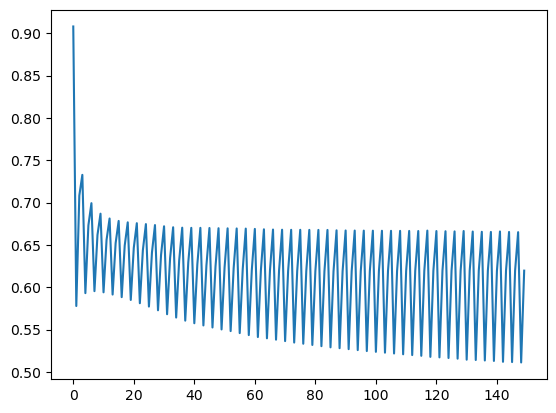

In [400]:
plt.plot(loss_hist)

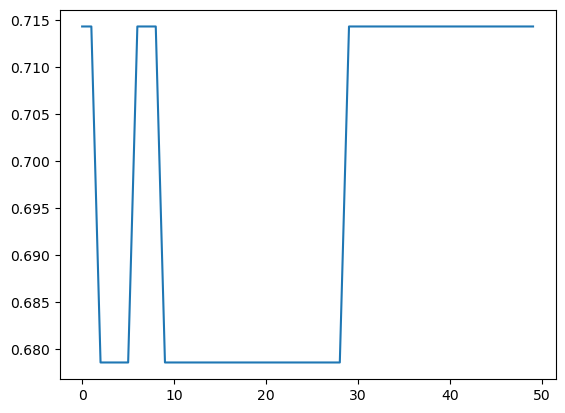

In [401]:
plt.plot(acc_hist)